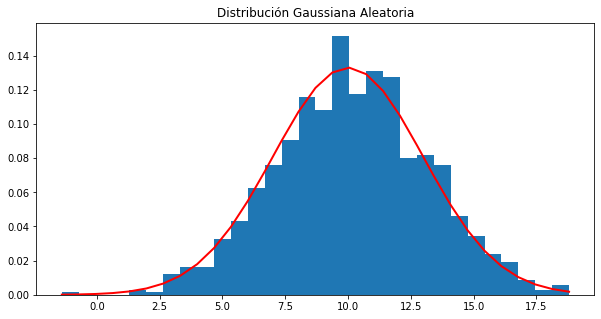

In [186]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
mu = 10
sigma = 3
s = np.random.normal(mu, sigma, 1000)
x = np.arange(len(s))

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.title("Distribución Gaussiana Aleatoria")
plt.show()

Text(0.5, 1.0, 'Diagrama de Dispersión de Distribución Gaussiana')

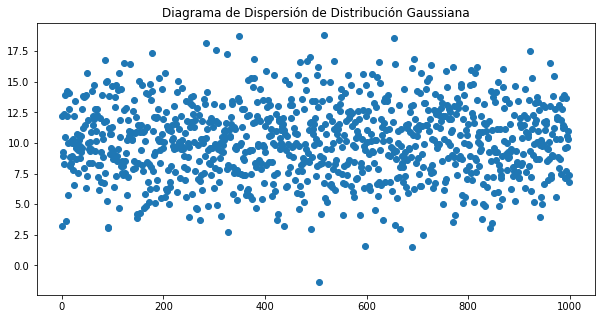

In [187]:
plt.scatter(x,s)
plt.title("Diagrama de Dispersión de Distribución Gaussiana")

Gcal es:  4.219096035558643
Gtable es:  4.039978163760361
23 ES UNA ANOMALÍA


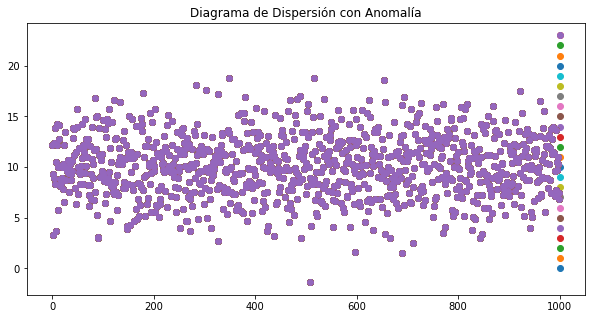

In [188]:
import pandas as pd
import scipy.stats as stats

def Gcalculada(arreglo, posible_outlier,printing = False):
  arreglo = np.append(arreglo,posible_outlier)
  x = np.arange(len(arreglo))
  
  prom_s = np.mean(arreglo)
  std_s = np.std(arreglo)
  abs_avg = abs(arreglo-prom_s)
  max_desv = max(abs_avg)
  Gcal = max_desv/std_s
  plt.scatter(x,arreglo)
  plt.title("Diagrama de Dispersión con Anomalía")
  if printing == True:
    print("Gcal es: ", Gcal)
  return Gcal
  
def Gtable(size, alpha, printing = False):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    if printing == True:
      print("Gtable es: ", critical_value)
    return critical_value

for i in range(0,30):
  arreglo = s

  if Gcalculada(arreglo, i) >  Gtable(len(arreglo),0.05):
    arreglo = s
    Gcalculada(arreglo,i,True)
    Gtable(len(arreglo),0.05,True)
    print(i, "ES UNA ANOMALÍA")
    break

Gcal es:  3.816395764499057
Gtable es:  4.039978163760361


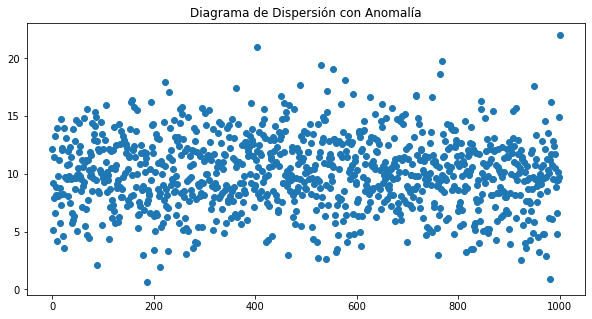

In [17]:
Gcalculada(arreglo,22,True);
Gtable(len(arreglo),0.05,True);

In [1]:
import pandas as pd
from google.colab import files

files.upload()

Saving wald_1x.csv to wald_1x.csv


{'wald_1x.csv': b'20.4\t203.3\n88.9\t232.3\n72.4\t211\n97.3\t207.6\n86.1\t188.1\n53.4\t172.8\n25.9\t151.6\n60.2\t143.11\n36.9\t128.6\n64.3\t117.6\n80.8\t131.1\n117.8\t109.9\n119.1\t124.4\n117.8\t147.3\n124.7\t173.6\n143.8\t116.8\n134.1\t135.4\n134.2\t137.9\n149.3\t160.1\n161.6\t172\n149.3\t193.2\n164.3\t204.3\n166.9\t105.6\n172.7\t107.4\n180.8\t96.3\n184.9\t104\n205.5\t112.5\n209.5\t132.1\n209.6\t135.4\n191.8\t139.6\n189\t146.6\n168.4\t136.3\n165.8\t139.6\n234.4\t155.8\n216.4\t162.2\n215.1\t164.3\n194.5\t187.3\n207\t219.5\n227.5\t201.7\n255\t228.8\n270\t194.8\n249.4\t174.5\n267.2\t160.9\n256.2\t136.3\n267.2\t124.4\n243.8\t104.8\n249.4\t89.6\n226.1\t85.3\n227.5\t88.6\n246.6\t12.2\n249.4\t41.1\n249.41\t48.8\n259.1\t56.4\n271.3\t68.4\n323.5\t5.4\n305.5\t28.4\n283.7\t43.7\n307.1\t65.8\n286.5\t86.1\n324.8\t87.9\n302.9\t106.6\n322\t125.3\n294.6\t138\n334.4\t160.9\n332.9\t165.1\n316.7\t177.1\n307\t228.1\n332.9\t215.3\n339.8\t219.5\n376.9\t92.9\n386.5\t114.1\n360.4\t119.3\n355\t154.1\n355.1\t1

In [129]:
df = pd.read_csv("wald_1x.csv",header=None,delimiter='\t')
avion = df.to_numpy()

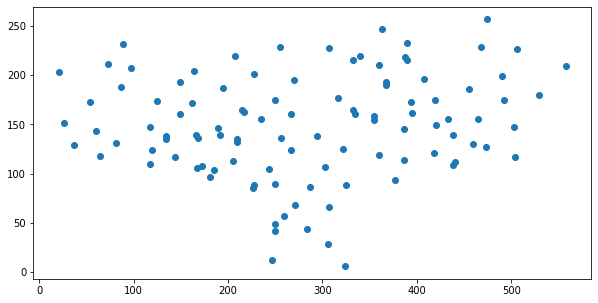

In [94]:
plt.scatter(avion[:,0], avion[:,1])
# listavion = avion.tolist()
# listavion.append([100,1])
# listavion = np.array(listavion)
# plt.scatter(listavion[:,0], listavion[:,1])

Gtable es:  3.403843506981005
mu:  285.1604716981132 std:  138.7417880784714
valores por encima de:  757.4158061959527
Gcalculada:  3.4044503450880628


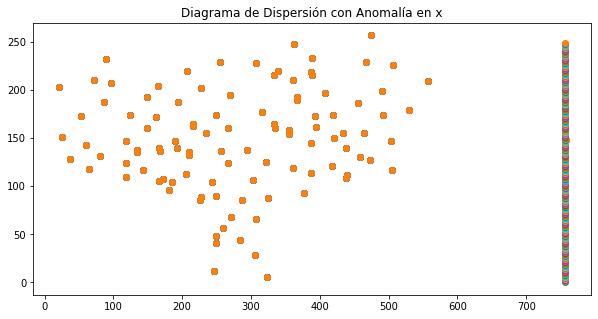

In [229]:
def Gcalculada(arreglo, posible_outlierx,posible_outliery, printing = False):
  listavion = arreglo.tolist()
  listavion.append([posible_outlierx,posible_outliery])
  arreglo = np.array(listavion)
  plt.scatter(arreglo[:,0], arreglo[:,1])
  plt.title("Diagrama de Dispersión con Anomalía en x" )
  prom_s = np.mean(arreglo[:,0])
  std_s = np.std(arreglo[:,0])
  
  abs_avg = abs(arreglo[:,0]-prom_s)
  max_desv = max(abs_avg)
  Gcal = max_desv/std_s
  if printing == True:
    print("mu: ", prom_s, "std: ",std_s)
    return prom_s, std_s
  return Gcal
  
def Gtable(size, alpha, printing = False):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    if printing == True:
      print("Gtable es: ", critical_value)
    return critical_value

gtable = Gtable(len(avion)+1, 0.05,True)
prom, sigma = Gcalculada(avion, 757.5,np.mean(avion[:,1]),True)
print("valores por encima de: ", (gtable*sigma)+prom)
print("Gcalculada: ", Gcalculada(avion, 757.5,np.mean(avion[:,1])))

for l in range(0,250):
  Gcalculada(avion, 756.833,l)


Gtable es:  3.403843506981005
Gcalculada:  3.411606256955471


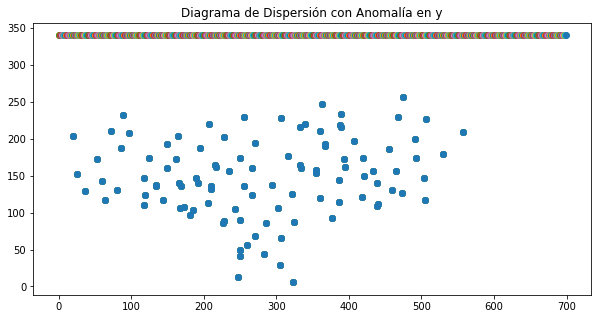

In [230]:
def Gcalculada(arreglo, posible_outlierx,posible_outliery, printing = False):

  listavion = arreglo.tolist()
  listavion.append([posible_outlierx,posible_outliery])
  arreglo = np.array(listavion)
  plt.scatter(arreglo[:,0], arreglo[:,1])
  plt.title("Diagrama de Dispersión con Anomalía en y")
  prom_s = np.mean(arreglo[:,1])
  std_s = np.std(arreglo[:,1])
  abs_avg = abs(arreglo[:,1]-prom_s)
  max_desv = max(abs_avg)
  Gcal = max_desv/std_s
  if printing == True:
    print("Gcal es: ", Gcal)
  return Gcal
  
def Gtable(size, alpha, printing = False):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    if printing == True:
      print("Gtable es: ", critical_value)
    return critical_value

Gtable(len(avion)+1, 0.05, True)

print("Gcalculada: ", Gcalculada(avion, np.mean(avion[:,0]),340))
for l in range(0,700):
  Gcalculada(avion, l,340)